1. Identify all NAs in the data.
2. Summary Statistics Table
3. Scatterplots
4. Heat Maps (Correlations)
5. Hypothesis Testing
6. Regression

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels.formula.api  as smf

In [37]:
walkable_cities = pd.read_csv("walkable-cities.csv")
walkable_cities

,place_code,city,state,pop_estimate_2021,state_code,city_state,city_state_code,place_state_code,geo_code,land_area_sqkm,pop_per_km2,county_state,median_age,male,female,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,native_hawaiian_and_other_pacific_islander_alone,some_other_race_alone,two_or_more_races,hispanic_or_latino,access2,arthritis,binge,bphigh,bpmed,cancer,casthma,cervical,chd,checkup,cholscreen,colon_screen,copd,corem,corew,csmoking,dental,depression,diabetes,ghlth,highchol,kidney,lpa,mammouse,mhlth,obesity,phlth,sleep,stroke,teethlost,cumulative_confirmed,cumulative_deceased,walk_score,bike_score,drive_commute,public_transit_commute,walk_commute,bike_commute,work_from_home,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
0,3076,Auburn,Alabama,78564,AL,"Auburn, Alabama","Auburn, AL",3076AL,103076.0,157.084761,500.137630,"Lee, Alabama",27.8,0.483186,0.516662,0.622652,0.178313,0.003029,0.094369,0.000484,0.020327,0.050010,0.046064,14.65,26.45,16.05,37.05,69.45,5.75,9.65,82.95,6.15,76.55,86.75,72.85,7.10,41.70,43.35,16.20,66.55,25.10,11.10,17.05,31.80,2.90,24.30,74.10,16.00,36.00,10.60,35.85,3.10,11.85,0.482257,0.004340,28,38,NaN,NaN,NaN,NaN,NaN,0.370857,79325.0,29770.0,48531.0,32556.0,0.231926,NaN,NaN,NaN,NaN
1,7000,Birmingham,Alabama,197575,AL,"Birmingham, Alabama","Birmingham, AL",7000AL,107000.0,380.801025,518.840515,"Jefferson, Alabama",37.2,0.479291,0.514812,0.238942,0.694906,0.003821,0.016576,0.000623,0.027129,0.033987,0.046939,15.45,28.50,13.80,38.90,71.65,6.20,9.75,86.70,6.65,77.95,89.30,78.90,7.05,44.65,40.50,15.85,63.25,22.45,12.85,17.80,30.25,3.20,25.10,80.55,15.15,38.85,10.35,37.70,3.55,12.10,0.640776,0.008178,33,31,83.6,0.9,2.8,0.1,12.0,0.443224,58012.0,27211.0,36614.0,36193.0,0.270712,7.4,51.0,NaN,NaN
2,20104,Decatur,Alabama,57804,AL,"Decatur, Alabama","Decatur, AL",20104AL,120104.0,140.785624,410.581694,"Morgan, Alabama",NaN,NaN,NaN,0.574182,0.232527,0.007491,0.009186,0.000969,0.103505,0.074459,0.156910,17.65,31.25,15.40,37.40,69.45,6.70,9.75,83.15,7.60,75.40,86.95,71.25,8.95,39.55,44.60,20.35,61.00,26.40,12.50,19.45,33.80,3.20,28.60,73.80,16.80,40.15,12.25,37.85,3.60,14.00,0.625683,0.008961,25,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31259.0,NaN,NaN,39.0,NaN,NaN
3,21184,Dothan,Alabama,71175,AL,"Dothan, Alabama","Dothan, AL",21184AL,121184.0,232.650562,305.930918,"Houston, Alabama",40.5,0.473565,0.527952,0.568964,0.335736,0.004004,0.016031,0.000660,0.020288,0.052870,0.043990,17.15,29.85,13.40,43.45,70.35,6.65,10.10,83.85,7.55,77.65,87.65,74.35,8.70,44.15,35.90,20.10,58.45,26.35,12.70,20.65,33.95,3.40,32.65,71.25,16.85,39.10,12.30,39.90,3.95,14.20,0.362487,0.007109,22,31,89.1,0.0,1.3,0.1,7.9,0.425725,70513.0,31168.0,45088.0,31803.0,0.209933,5.3,NaN,NaN,NaN
4,35896,Hoover,Alabama,92589,AL,"Hoover, Alabama","Hoover, AL",35896AL,135896.0,124.490626,743.742746,"Jefferson, Alabama",38.9,0.504066,0.495923,0.687598,0.168713,0.002743,0.064036,0.000216,0.020953,0.055925,0.050805,15.45,28.50,13.80,38.90,71.65,6.20,9.75,86.70,6.65,77.95,89.30,78.90,7.05,44.65,40.50,15.85,63.25,22.45,12.85,17.80,30.25,3.20,25.10,80.55,15.15,38.85,10.35,37.70,3.55,12.10,0.640776,0.008178,17,12,NaN,NaN,NaN,NaN,NaN,0.396602,124562.0,50046.0,99276.0,36193.0,0.059813,3.5,51.0,0.001231,0.020758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,66000,Racine,Wisconsin,77127,WI,"Racine, Wisconsin","Racine, WI",66000WI,5566000.0,40.080067,1924.323130,"Racine, Wisconsin",34.6,0.476954,0.523098,0.519247,0.241394,0.007092,0.007792,0.000298,0.104723,0.128386,0.244480,12.65,24.25,23.75,31.45,65.50,6.55,10.10,83.45,6.05,75.40,81.15,63.45,6.10,38.85,36.60,18.00,68.70,1

In [38]:
display(walkable_cities.columns)

Index(['place_code', 'city', 'state', 'pop_estimate_2021', 'state_code',
       'city_state', 'city_state_code', 'place_state_code', 'geo_code',
       'land_area_sqkm', 'pop_per_km2', 'county_state', 'median_age', 'male',
       'female', 'white_alone', 'black_or_african_american_alone',
       'american_indian_and_alaska_native_alone', 'asian_alone',
       'native_hawaiian_and_other_pacific_islander_alone',
       'some_other_race_alone', 'two_or_more_races', 'hispanic_or_latino',
       'access2', 'arthritis', 'binge', 'bphigh', 'bpmed', 'cancer', 'casthma',
       'cervical', 'chd', 'checkup', 'cholscreen', 'colon_screen', 'copd',
       'corem', 'corew', 'csmoking', 'dental', 'depression', 'diabetes',
       'ghlth', 'highchol', 'kidney', 'lpa', 'mammouse', 'mhlth', 'obesity',
       'phlth', 'sleep', 'stroke', 'teethlost', 'cumulative_confirmed',
       'cumulative_deceased', 'walk_score', 'bike_score', 'drive_commute',
       'public_transit_commute', 'walk_commute', 'bike_comm

In [39]:
#uses the loc method to select the subset of rows and columns where the column names are not duplicated. 
walkable_cities = walkable_cities.loc[:,~walkable_cities.columns.duplicated()]
#removes the specified columns from the walkable_cities dataframe
walkable_cities.drop(walkable_cities.columns[[4,5,6,7,11]], axis=1, inplace=True)
walkable_cities

,place_code,city,state,pop_estimate_2021,geo_code,land_area_sqkm,pop_per_km2,median_age,male,female,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,native_hawaiian_and_other_pacific_islander_alone,some_other_race_alone,two_or_more_races,hispanic_or_latino,access2,arthritis,binge,bphigh,bpmed,cancer,casthma,cervical,chd,checkup,cholscreen,colon_screen,copd,corem,corew,csmoking,dental,depression,diabetes,ghlth,highchol,kidney,lpa,mammouse,mhlth,obesity,phlth,sleep,stroke,teethlost,cumulative_confirmed,cumulative_deceased,walk_score,bike_score,drive_commute,public_transit_commute,walk_commute,bike_commute,work_from_home,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
0,3076,Auburn,Alabama,78564,103076.0,157.084761,500.137630,27.8,0.483186,0.516662,0.622652,0.178313,0.003029,0.094369,0.000484,0.020327,0.050010,0.046064,14.65,26.45,16.05,37.05,69.45,5.75,9.65,82.95,6.15,76.55,86.75,72.85,7.10,41.70,43.35,16.20,66.55,25.10,11.10,17.05,31.80,2.90,24.30,74.10,16.00,36.00,10.60,35.85,3.10,11.85,0.482257,0.004340,28,38,NaN,NaN,NaN,NaN,NaN,0.370857,79325.0,29770.0,48531.0,32556.0,0.231926,NaN,NaN,NaN,NaN
1,7000,Birmingham,Alabama,197575,107000.0,380.801025,518.840515,37.2,0.479291,0.514812,0.238942,0.694906,0.003821,0.016576,0.000623,0.027129,0.033987,0.046939,15.45,28.50,13.80,38.90,71.65,6.20,9.75,86.70,6.65,77.95,89.30,78.90,7.05,44.65,40.50,15.85,63.25,22.45,12.85,17.80,30.25,3.20,25.10,80.55,15.15,38.85,10.35,37.70,3.55,12.10,0.640776,0.008178,33,31,83.6,0.9,2.8,0.1,12.0,0.443224,58012.0,27211.0,36614.0,36193.0,0.270712,7.4,51.0,NaN,NaN
2,20104,Decatur,Alabama,57804,120104.0,140.785624,410.581694,NaN,NaN,NaN,0.574182,0.232527,0.007491,0.009186,0.000969,0.103505,0.074459,0.156910,17.65,31.25,15.40,37.40,69.45,6.70,9.75,83.15,7.60,75.40,86.95,71.25,8.95,39.55,44.60,20.35,61.00,26.40,12.50,19.45,33.80,3.20,28.60,73.80,16.80,40.15,12.25,37.85,3.60,14.00,0.625683,0.008961,25,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31259.0,NaN,NaN,39.0,NaN,NaN
3,21184,Dothan,Alabama,71175,121184.0,232.650562,305.930918,40.5,0.473565,0.527952,0.568964,0.335736,0.004004,0.016031,0.000660,0.020288,0.052870,0.043990,17.15,29.85,13.40,43.45,70.35,6.65,10.10,83.85,7.55,77.65,87.65,74.35,8.70,44.15,35.90,20.10,58.45,26.35,12.70,20.65,33.95,3.40,32.65,71.25,16.85,39.10,12.30,39.90,3.95,14.20,0.362487,0.007109,22,31,89.1,0.0,1.3,0.1,7.9,0.425725,70513.0,31168.0,45088.0,31803.0,0.209933,5.3,NaN,NaN,NaN
4,35896,Hoover,Alabama,92589,135896.0,124.490626,743.742746,38.9,0.504066,0.495923,0.687598,0.168713,0.002743,0.064036,0.000216,0.020953,0.055925,0.050805,15.45,28.50,13.80,38.90,71.65,6.20,9.75,86.70,6.65,77.95,89.30,78.90,7.05,44.65,40.50,15.85,63.25,22.45,12.85,17.80,30.25,3.20,25.10,80.55,15.15,38.85,10.35,37.70,3.55,12.10,0.640776,0.008178,17,12,NaN,NaN,NaN,NaN,NaN,0.396602,124562.0,50046.0,99276.0,36193.0,0.059813,3.5,51.0,0.001231,0.020758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,66000,Racine,Wisconsin,77127,5566000.0,40.080067,1924.323130,34.6,0.476954,0.523098,0.519247,0.241394,0.007092,0.007792,0.000298,0.104723,0.128386,0.244480,12.65,24.25,23.75,31.45,65.50,6.55,10.10,83.45,6.05,75.40,81.15,63.45,6.10,38.85,36.60,18.00,68.70,19.70,10.00,13.25,32.55,2.90,21.70,76.00,13.70,36.10,10.15,32.90,3.00,10.20,0.748493,0.008946,56,54,84.0,1.8,1.8,0.0,8.6,0.400443,60267.0,24591.0,47861.0,33541.0,0.221427,6.4,43.0,0.003773,0.012836
756,84250,Waukesha,Wisconsin,71256,5584250.0,66.102904,1077.955667,36.2,0.482654,0.517318,0.784608,0.034608,0.005235,0.033738,0.000575,0.044375,0.095487,0.140044,8.40,21.75,23.70,26.85,64.80,6.95,8.85,85.35,5.10,76.90,83.80,66.40,4.60,42.50,41.15,12.60,77.45,18.45,7.

In [40]:
# Set the maximum number of rows and columns displayed
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# Identify all NA values in the dataframe
na_values = walkable_cities.isna().sum()

# Print the resulting dataframe
display(na_values)

place_code                                            0
city                                                  0
state                                                 0
pop_estimate_2021                                     0
geo_code                                              4
land_area_sqkm                                        4
pop_per_km2                                           4
median_age                                          196
male                                                196
female                                              196
white_alone                                           5
black_or_african_american_alone                       5
american_indian_and_alaska_native_alone               5
asian_alone                                           5
native_hawaiian_and_other_pacific_islander_alone      5
some_other_race_alone                                 5
two_or_more_races                                     5
hispanic_or_latino                              

In [41]:
#Summary Statistics Table
walkable_cities.describe()

,place_code,pop_estimate_2021,geo_code,land_area_sqkm,pop_per_km2,median_age,male,female,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,native_hawaiian_and_other_pacific_islander_alone,some_other_race_alone,two_or_more_races,hispanic_or_latino,access2,arthritis,binge,bphigh,bpmed,cancer,casthma,cervical,chd,checkup,cholscreen,colon_screen,copd,corem,corew,csmoking,dental,depression,diabetes,ghlth,highchol,kidney,lpa,mammouse,mhlth,obesity,phlth,sleep,stroke,teethlost,cumulative_confirmed,cumulative_deceased,walk_score,bike_score,drive_commute,public_transit_commute,walk_commute,bike_commute,work_from_home,households,mean_household_income,mean_income,median_household_income,living_wage,poverty,unemployment_rate,median_aqi,violent_crime,property_crime
count,760.000000,7.600000e+02,7.560000e+02,756.000000,756.000000,564.000000,564.000000,564.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,727.000000,727.000000,727.000000,711.000000,711.000000,727.000000,727.000000,727.000000,727.000000,727.000000,711.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,711.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,733.000000,733.000000,760.000000,760.000000,392.000000,392.000000,392.000000,392.000000,392.000000,563.000000,563.000000,564.000000,564.000000,727.000000,564.000000,518.000000,681.000000,633.000000,633.000000
mean,42201.003947,1.646429e+05,2.451419e+06,135.344888,1589.308126,36.554787,0.492196,0.508244,0.530158,0.136474,0.010493,0.082841,0.002794,0.114198,0.121619,0.247203,16.091816,22.160316,16.813411,29.640366,63.776723,5.912311,9.669532,81.740096,5.808872,71.852476,85.620253,68.686726,5.922558,43.091678,36.957221,14.563618,63.510591,19.193329,10.319326,14.422283,29.804993,2.807497,22.557359,72.440371,14.361279,31.499656,9.835144,33.107153,2.842847,10.194223,0.497485,0.005581,41.485526,46.298684,73.461990,2.677041,2.746939,0.647194,18.683418,0.382859,97922.424512,37995.865248,73858.675532,38843.456671,0.135641,6.892085,47.157122,0.004210,0.025443
std,24175.783004,3.924743e+05,1.704521e+06,186.608511,1505.860211,4.354124,0.018344,0.017905,0.195627,0.153452,0.010476,0.107579,0.006175,0.108583,0.062234,0.205923,6.837126,3.107948,2.260885,3.786599,3.813131,0.633356,0.906589,2.511802,0.804584,4.604071,2.332350,6.368350,1.259170,6.783988,6.250192,3.496685,6.198783,3.092191,1.798349,3.359495,2.100245,0.334807,4.340178,3.874187,1.434712,5.274307,1.591837,3.330289,0.442021,2.556524,0.336419,0.004845,16.236795,12.495227,12.821877,4.037735,2.473717,1.060421,9.771837,0.049541,33448.610008,13202.716289,26481.199768,6538.581192,0.061697,2.587433,17.362578,0.003196,0.012229
min,0.000000,5.010400e+04,1.030760e+05,3.238030,93.047234,22.800000,0.427906,0.342966,0.025274,0.002961,0.001181,0.001917,0.000075,0.007337,0.024205,0.019868,5.600000,16.200000,8.700000,20.750000,53.050000,4.200000,7.800000,71.950000,4.300000,64.050000,78.550000,54.900000,3.750000,29.950000,24.450000,6.500000,42.550000,12.500000,6.300000,8.250000,23.650000,2.200000,12.350000,60.350000,10.350000,17.350000,6.250000,23.500000,2.050000,5.450000,0.022447,0.000384,0.000000,12.000000,21.600000,0.000000,0.200000,0.000000,2.500000,0.245462,49626.000000,17236.000000,32217.000000,29353.000000,0.017209,1.300000,15.000000,0.000298,0.005378
25%,21000.000000,6.490600e+04,6.745655e+05,49.981347,797.451711,33.900000,0.480277,0.497261,0.398436,0.030277,0.004162,0.023772,0.000479,0.035492,0.077712,0.089025,11.275000,19.750000,15.600000,26.300000,60.350000,5.450000,9.000000,80.275000,5.150000,68.150000,84.150000,62.450000,5.100000,38.600000,32.400000,11.750000,59.650000,16.700000,9.200000,11.900000,27.950000,2.550000,19.600000,69.450000,13.350000,28.300000,8.600000,31.000000,2.500000,8.150000,0.326561,0.002713,31.000000,38.000000,67.950000,0.600000,1.275000,0.100000,11.750000,0.352608,75498

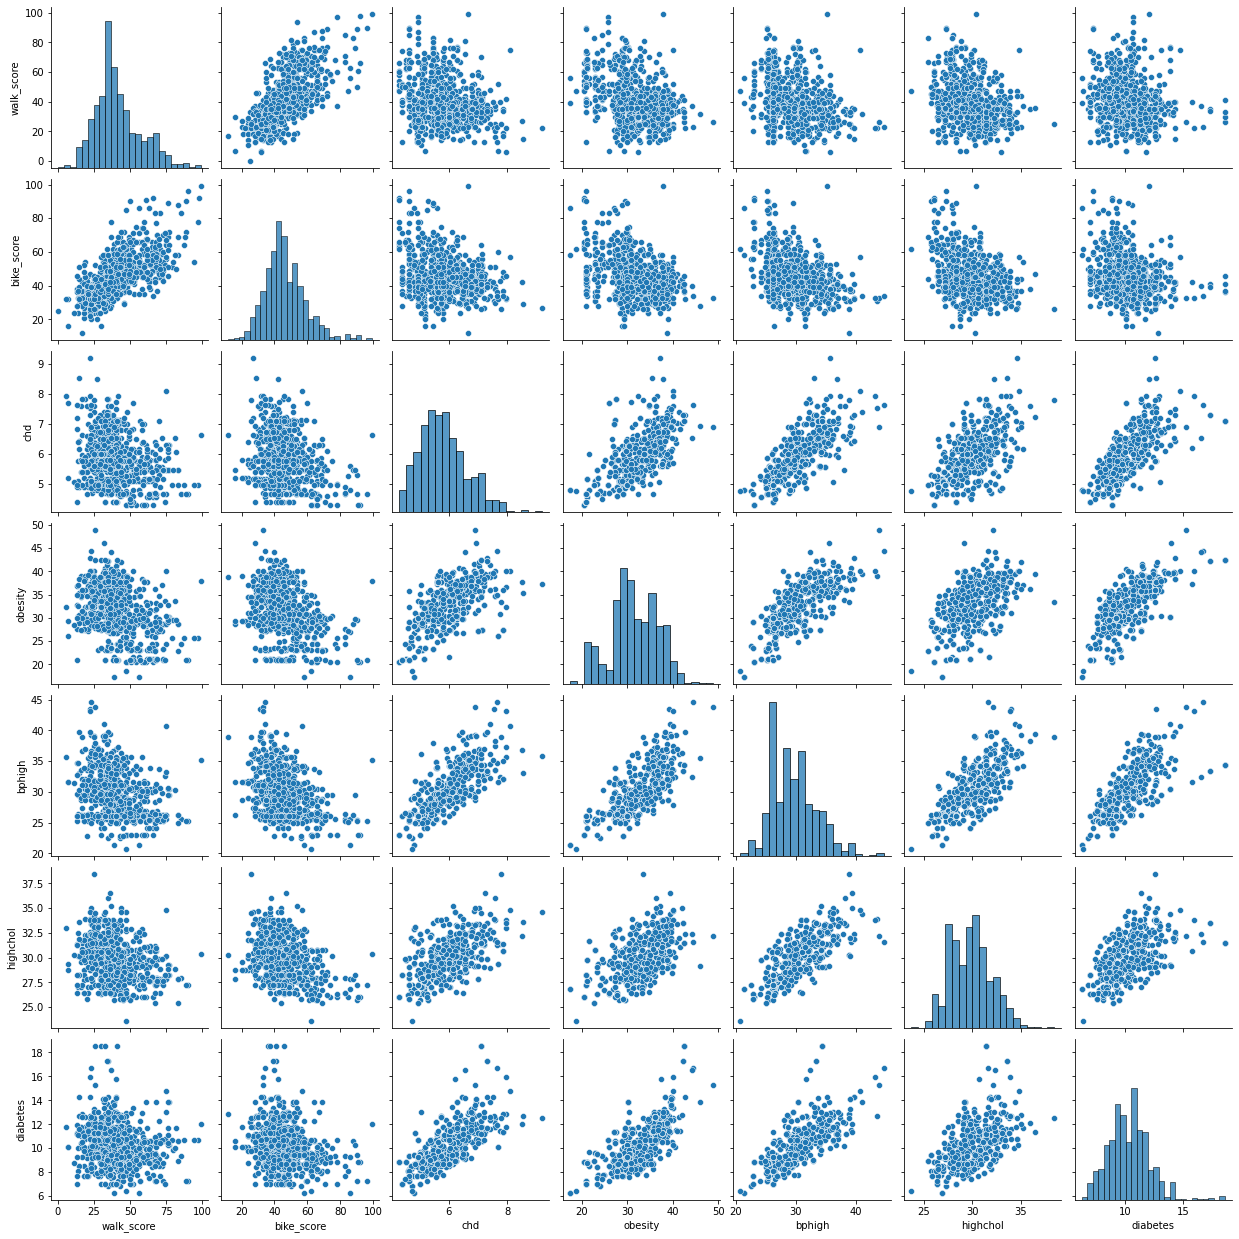

In [42]:
# Create a scatter plot matrix
sns.pairplot(walkable_cities[['walk_score', 'bike_score', 'chd', 'obesity', 'bphigh', 'highchol', 'diabetes']])

# Show the plot
plt.show()

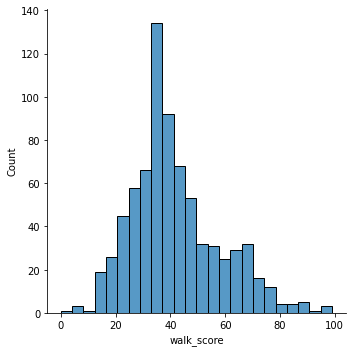

In [43]:
# Select the "col_a" column from the dataframe
hist_walk = walkable_cities['walk_score']

# Plot a histogram of the "col_a" column using seaborn
sns.displot(hist_walk, kde=False)

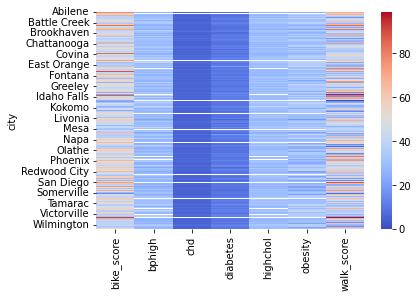

In [44]:
#Heat Maps
# Create a list only with the features needed
walkable_values = ['walk_score', 'bike_score', 'chd', 'obesity', 'bphigh', 'highchol', 'diabetes']
# Create a pivot table with the "city" column as the index and the "walk_score" column as the values
walkable_pivot_table = walkable_cities.pivot_table(index="city", values=walkable_values)

# Create a heatmap of the pivot table
sns.heatmap(walkable_pivot_table, cmap="coolwarm")

# Show the plot
plt.show()

In [45]:
#Group the cities in a dataframe by the "walk_score" column and create a heat map

# Create a new column with the "walk_score" values binned into ranges of 10
walkable_cities["walk_score_range"] = pd.cut(walkable_cities["walk_score"], bins=range(0, 110, 10))

# Create a pivot table with the "city" column as the index and the "walk_score_range" column as the values
walkable_pivot_table_1  = walkable_cities.pivot_table(index="city", values="walk_score_range")

# Create a heatmap of the pivot table
sns.heatmap(walkable_pivot_table_1)

# Show the plot
plt.show()

<ipython-input-45-bb9e895fda50>:7: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  walkable_pivot_table_1  = walkable_cities.pivot_table(index="city", values="walk_score_range")


ValueError: zero-size array to reduction operation fmin which has no identity

In [46]:
# Check if the pivot table contains any non-NaN values
if walkable_pivot_table_1.notnull().values.any():
    # Create a heatmap of the pivot table
    sns.heatmap(walkable_pivot_table_1)

    # Show the plot
    plt.show()
else:
    print("The pivot table does not contain any non-NaN values.")

The pivot table does not contain any non-NaN values.


In [47]:
# Correlations

top_neg_corr_walk = walkable_cities.corr()['walk_score'].sort_values(ascending = True)[1:11]
top_pos_corr_walk = walkable_cities.corr()['walk_score'].sort_values(ascending = False)[1:11]
top_neg_corr_bike = walkable_cities.corr()['walk_score'].sort_values(ascending = True)[1:11]
top_pos_corr_bike = walkable_cities.corr()['walk_score'].sort_values(ascending = False)[1:11]


<ipython-input-47-667168bf25f2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_neg_corr_walk = walkable_cities.corr()['walk_score'].sort_values(ascending = True)[1:11]
<ipython-input-47-667168bf25f2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_pos_corr_walk = walkable_cities.corr()['walk_score'].sort_values(ascending = False)[1:11]
<ipython-input-47-667168bf25f2>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_neg_corr_bike = walkable_cities.corr()['walk_sc

In [48]:
top_pos_corr_walk

pop_per_km2               0.717293
bike_score                0.669675
public_transit_commute    0.624452
living_wage               0.456153
walk_commute              0.412196
some_other_race_alone     0.377455
unemployment_rate         0.319987
bike_commute              0.294994
hispanic_or_latino        0.282338
violent_crime             0.244624
Name: walk_score, dtype: float64

In [49]:
top_neg_corr_walk

obesity       -0.364952
bphigh        -0.341471
depression    -0.335364
white_alone   -0.318726
highchol      -0.316193
csmoking      -0.301707
arthritis     -0.300755
corem         -0.243192
chd           -0.239847
copd          -0.219883
Name: walk_score, dtype: float64

In [50]:
# Hypothesis Testing and model

# Create a multiple linear regression model with the dependent variable and the independent variables
model = smf.ols('walk_score ~ bike_score + chd + obesity + bphigh + highchol + diabetes', data=walkable_cities).fit()

# Dependent variable - 'walk_score'
# Independent variables - 'bike_score', 'chd', 'obesity', 'bphigh', 'highchol', 'diabetes'

# Print the summary of the model
print(model.summary())

# Define the null and alternate hypotheses
null_hypothesis = "There is no relationship between walk_score and the independent variables"
alternate_hypothesis = "There is a relationship between walk_score and the independent variables"

# Perform the F-test
f_test = model.f_test(np.identity(len(model.params)))

# Print the p-value of the F-test
print(f"p-value = {f_test.pvalue:.4f}")

# Interpret the results
if f_test.pvalue < 0.05:
    print("Reject the null hypothesis")
    print(alternate_hypothesis)
else:
    print("Fail to reject the null hypothesis")
    print(null_hypothesis)

                            OLS Regression Results                            
Dep. Variable:             walk_score   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     106.9
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.39e-95
Time:                        09:35:21   Log-Likelihood:                -2717.8
No. Observations:                 711   AIC:                             5450.
Df Residuals:                     704   BIC:                             5482.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.4468      7.285      3.218      0.0

ChatGPT Explanation 

In this output, the Dep. Variable is the dependent variable of the multiple linear regression model, which is walk_score in this case. The R-squared value is a measure of how well the model fits the data. It is the percentage of the variance in the dependent variable that is explained by the independent variables. In this case, the R-squared value is 0.477, which means that about 47.7% of the variance in the walk_score variable is explained by the independent variables in the model.

The Adj. R-squared value is the adjusted R-squared, which takes into account the number of independent variables in the model. It is a modified version of the R-squared that is more conservative when there are many independent variables in the model. The Adj. R-squared value is 0.472 in this case, which is slightly lower than the R-squared value.

The F-statistic and Prob (F-statistic) values are used to test the overall significance of the model. The F-statistic is a measure of the overall strength of the relationship between the dependent variable and the independent variables. The Prob (F-statistic) is the p-value of the F-statistic, which is used to test the null hypothesis that all of the independent variables in the model are unrelated to the dependent variable against the alternative hypothesis that at least one of the independent variables is related to the dependent variable. In this case, the F-statistic is 106.9 and the Prob (F-statistic) is 1.39e-95, which is a very small p-value. This suggests that there is a strong relationship between the dependent variable and at least one of the independent variables.

coef column contains the coefficients of the independent variables in the model. These coefficients represent the estimated change in the dependent variable (walk_score) for a one unit change in the independent variable while holding all other independent variables constant. For example, in the case of the bike_score coefficient, a one unit increase in bike_score is associated with an estimated increase of 0.7526 units in walk_score.

The std err column contains the standard errors of the coefficients, which are used to calculate the t-values and p-values for the coefficients. The t column contains the t-values for the coefficients, which are used to test the null hypothesis that the coefficient is equal to zero against the alternative hypothesis that the coefficient is not equal to zero. The P>|t| column contains the p-values for the t-tests, which are used to assess the statistical significance of the coefficients. The [0.025 0.975] column contains the 95% confidence intervals for the coefficients, which provide a range of values within which the true coefficient is likely to fall.

For example, in the case of the bike_score coefficient, the coefficient value is 0.7526, the standard error is 0.038, the t-value is 19.946, and the p-value is 0.000. This suggests that the bike_score coefficient is statistically significant and not equal to zero. The 95% confidence interval for the bike_score coefficient is [0.679, 0.827], which means that the true coefficient is likely to fall within this range.

The Omnibus, Durbin-Watson, Jarque-Bera (JB), and Kurtosis values are used to assess the assumptions of the multiple linear regression model. The Omnibus value is a measure of the skewness and kurtosis of the residuals (i.e., the errors of the model). The Durbin-Watson value is a measure of the autocorrelation of the residuals. The Jarque-Bera (JB) value is a test of the normality of the residuals. 

The Omnibus test checks whether the residuals are normally distributed. The Durbin-Watson statistic tests for autocorrelation in the residuals. The Prob(Omnibus) and Prob(JB) values are the probabilities of the Omnibus and JB tests, respectively. The Cond. No. is a measure of multicollinearity in the model. A high value may indicate that the independent variables are correlated with each other and may affect the stability of the coefficients.
